<a href="https://colab.research.google.com/github/lujain618/Deepfake_Detection_With_XAI/blob/main/improvedCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os, datetime
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt
import pydotplus
import pydot
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [ ]:
base_dir = "/content/drive/MyDrive/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=64, class_mode='binary', target_size=(150, 150))
validation_generator = valid_datagen.flow_from_directory(valid_dir, batch_size=64, class_mode='binary', target_size=(150, 150))
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=64, class_mode='binary', target_size=(150, 150))


Found 0 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=32, class_mode='binary', target_size=(150, 150))

validation_generator = valid_datagen.flow_from_directory(valid_dir, batch_size=32, class_mode='binary', target_size=(150, 150))

test_generator = test_datagen.flow_from_directory(test_dir, batch_size=32, class_mode='binary', target_size=(150, 150))

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Model-CNN.h5")

In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(1064, activation='relu'),
     tf.keras.layers.Dense(2, activation='softmax')
    ]
)

In [ ]:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

checkpoint = ModelCheckpoint(
    "/content/drive/MyDrive/Model-CNN-best.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=1,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=500,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=20,
    callbacks=[checkpoint, early_stopping,reduce_lr]
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.6104 - loss: 0.7472 
Epoch 1: val_accuracy improved from -inf to 0.72422, saving model to /content/drive/MyDrive/Model-CNN-best.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 9080s 18s/step - accuracy: 0.6105 - loss: 0.7470 - val_accuracy: 0.7242 - val_loss: 0.5555 - learning_rate: 0.0010
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.7430 - loss: 0.5245 
Epoch 2: val_accuracy improved from 0.72422 to 0.79375, saving model to /content/drive/MyDrive/Model-CNN-best.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 6319s 13s/step - accuracy: 0.7431 - loss: 0.5244 - val_accuracy: 0.7937 - val_loss: 0.4526 - learning_rate: 0.0010
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8005 - loss: 0.4358
Epoch 3: val_accuracy improved from 0.79375 to 0.81250, saving model to /content/drive/MyDrive/Model-CNN-best.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 4445s 9s/step - accuracy: 0.8006 - loss: 0.4357 - val_accuracy: 0.8125 - val_loss: 0.4126 - learning_rate: 0.0010
Epoch 4/10
 63/500 ━━━━━━━━━━━━━━━━━━━━ 42:12 6s/step - accuracy: 0.8520 - loss: 0.3577

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 4: val_accuracy improved from 0.81250 to 0.84766, saving model to /content/drive/MyDrive/Model-CNN-best.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 634s 1s/step - accuracy: 0.8487 - loss: 0.3566 - val_accuracy: 0.8477 - val_loss: 0.3474 - learning_rate: 0.0010
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8471 - loss: 0.3502
Epoch 5: val_accuracy improved from 0.84766 to 0.86719, saving model to /content/drive/MyDrive/Model-CNN-best.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 3118s 6s/step - accuracy: 0.8472 - loss: 0.3502 - val_accuracy: 0.8672 - val_loss: 0.3190 - learning_rate: 0.0010
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8805 - loss: 0.2795
Epoch 6: val_accuracy improved from 0.86719 to 0.87031, saving model to /content/drive/MyDrive/Model-CNN-best.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 2285s 5s/step - accuracy: 0.8805 - loss: 0.2795 - val_accuracy: 0.8703 - val_loss: 0.3031 - learning_rate: 0.0010
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9039 - loss: 0.2338
Epoch 7: val_accuracy improved from 0.87031 to 0.89531, saving model to /content/drive/MyDrive/Model-CNN-best.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 2100s 4s/step - accuracy: 0.9039 - loss: 0.2338 - val_accuracy: 0.8953 - val_loss: 0.2484 - learning_rate: 0.0010
Epoch 8/10
 63/500 ━━━━━━━━━━━━━━━━━━━━ 28:11 4s/step - accuracy: 0.9286 - loss: 0.1761
Epoch 8: val_accuracy improved from 0.89531 to 0.91250, saving model to /content/drive/MyDrive/Model-CNN-best.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 501s 996ms/step - accuracy: 0.9303 - loss: 0.1795 - val_accuracy: 0.9125 - val_loss: 0.2337 - learning_rate: 0.0010
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9269 - loss: 0.1902
Epoch 9: val_accuracy did not improve from 0.91250
500/500 ━━━━━━━━━━━━━━━━━━━━ 2031s 4s/step - accuracy: 0.9269 - loss: 0.1902 - val_accuracy: 0.8977 - val_loss: 0.2387 - learning_rate: 0.0010
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9436 - loss: 0.1472
Epoch 10: val_accuracy did not improve from 0.91250

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
500/500 ━━━━━━━━━━━━━━━━━━━━ 2053s 4s/step - accuracy: 0.9436 - loss: 0.1472 - val_accuracy: 0.9062 - val_loss: 0.2538 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 8.


In [ ]:
model=("/content/drive/MyDrive/improve-ModelCNN.h5")


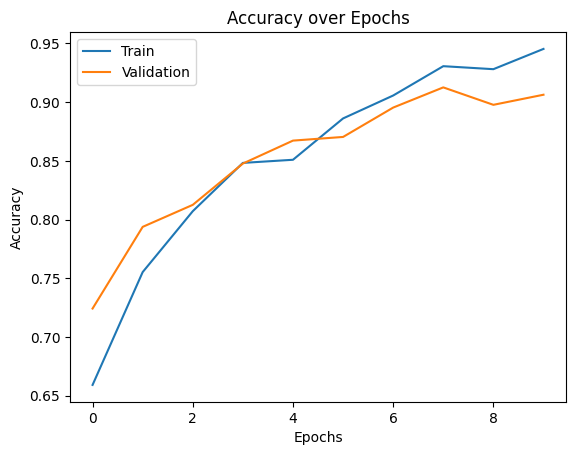

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
model.save("/content/drive/MyDrive/improve-ModelCNN.h5")


In [ ]:

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4968s 16s/step - accuracy: 0.8998 - loss: 0.2544
Test Accuracy: 0.90


AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_l'

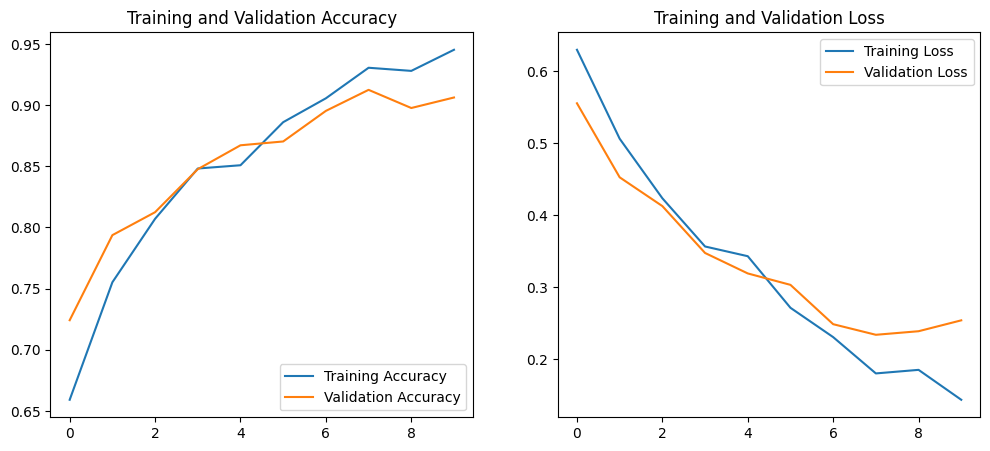

In [ ]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_l

In [28]:
!pip install shap lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e61ebb5aabb9a7ded855252d32e89a8d8d13c2cd15e3d933742e44e80f9a9e60
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [29]:
import shap
from lime import lime_image
import numpy as np
import matplotlib.pyplot as plt


In [37]:
img_path = test_generator.filepaths[0]  # example image
from tensorflow.keras.preprocessing import image

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize
img_array_exp = np.expand_dims(img_array, axis=0)  # batch format


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

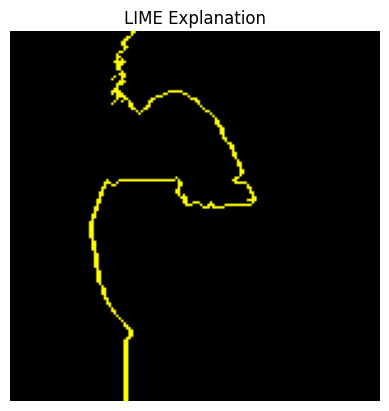

In [32]:
from skimage.segmentation import mark_boundaries

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    image=img_array.astype('double'),
    classifier_fn=lambda x: model.predict(x),
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    hide_rest=False,
    num_features=10,
    min_weight=0.0
)

plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("LIME Explanation")
plt.axis('off')
plt.show()


In [40]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image=img_array[0],  # shape should be (H, W, 3)
    classifier_fn=predict_fn,  # wrapper around your model
    top_labels=1,
    hide_color=0,
    num_samples=1000,
    segmentation_fn=lambda x: quickshift(x, kernel_size=4, max_dist=200, ratio=0.2)
)


NameError: name 'predict_fn' is not defined

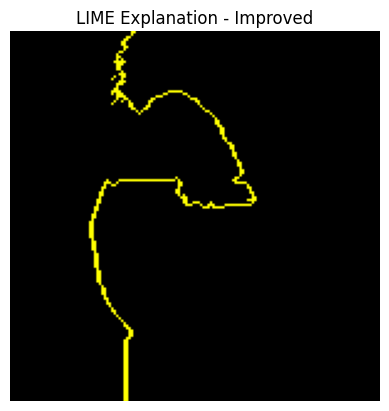

In [41]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    hide_rest=False,
    num_features=10,
    min_weight=0.0
)

plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("LIME Explanation - Improved")
plt.axis('off')
plt.show()


In [ ]:
import tensorflow.keras.backend as K
import cv2

def make_gradcam_heatmap(img_array, model, Conv2D, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(Conv2D).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_output = predictions[:, pred_index]

    grads = tape.gradient(class_output, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Generate heatmap
heatmap = make_gradcam_heatmap(img_array_exp, model, 'conv2d_2')

# Superimpose on image
img_orig = cv2.imread(img_path)
img_orig = cv2.resize(img_orig, (150, 150))
heatmap = cv2.resize(heatmap, (150, 150))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img_orig

# Display
plt.imshow(cv2.cvtColor(superimposed_img.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM")
plt.axis('off')
plt.show()
